In [ ]:
# pip install -U spacy;

In [ ]:
!python3 -m spacy download it_core_news_sm

In [2]:
import spacy;

In [11]:
# Load italian tokenizer, tagger, parser and NER
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 2000000

In [197]:
# Let us add some custom stop words:
from stop_words_it import *

In [198]:
custom_stop_words = set(custom_stop_words)

In [199]:
len(custom_stop_words)

632

In [200]:
len(nlp.Defaults.stop_words)

624

In [201]:
nlp.Defaults.stop_words |= custom_stop_words

In [202]:
len(nlp.Defaults.stop_words)

660

In [203]:
original_corpus = open('moby_dick.txt', encoding='utf-8').read()

In [204]:
corpus = original_corpus.replace('.', ' . ').replace("'", " ' ").replace(',', ' , ').replace(';', ' ; ')

In [205]:
type(corpus), len(corpus) # about 1.2 MB

(str, 1336835)

In [206]:
doc = nlp(corpus)

## Tokenization

In [207]:
tokens_with_flag = [(token.text, token.is_stop) for token in doc]

In [216]:
def is_good_token(tok):
    return not tok.is_stop and not tok.is_punct and len(tok.text)>2 and tok.pos_!='ADP' and tok.pos_!='AUX' and tok.pos_!='ADV' and tok.text!='ciò'

In [217]:
# Let us consider only significative tokens, i.e. not common words
tokens = [token.text for token in doc if is_good_token(token)]

In [218]:
len(tokens)

89146

In [219]:
# I can measure the language complexity of the novel under study
# [I could use this metrics in order to study the complexity speech of a politician, for example]
# bow = Bag Of Words
bow = set(tokens) 

In [220]:
len(bow)

24044

## Text occurrences

In [221]:
from collections import Counter

In [222]:
occurrences = Counter(tokens)

In [223]:
occurrences.most_common(20)

[('balena', 680),
 ('Achab', 513),
 ('nave', 484),
 ('mare', 419),
 ('un’', 343),
 ('lancia', 303),
 ('testa', 297),
 ('balene', 269),
 ('Quiqueg', 259),
 ('Stubb', 251),
 ('vecchio', 226),
 ('altra', 222),
 ('marinai', 202),
 ('Starbuck', 197),
 ('acqua', 191),
 ('caccia', 187),
 ('terra', 180),
 ('capitano', 180),
 ('poichè', 173),
 ('mano', 171)]

## Lemmatization

In [224]:
lemmas = [token.lemma_ for token in doc if is_good_token(token)]

In [225]:
bag_of_lemmas = set(lemmas)

In [226]:
len(bag_of_lemmas)

18850

In [227]:
bag_of_lemmas

{'supplire',
 'bordarre le',
 'usurpazione',
 'Datele',
 'copertura',
 'raccontare lo',
 'Scattate',
 'accecare si',
 'sommovimento',
 'fissandogla',
 'temperare',
 'prematura',
 'masnada',
 'Compresi',
 'stanga',
 'principale',
 'irrompere',
 'Segnalate',
 'colma',
 'armatura',
 'unite',
 'diagonale',
 'fammo',
 'decifrare',
 'abbassa',
 'aprile',
 'figlio',
 'groviglio',
 'barometro',
 'fastello',
 'grigiare',
 'Facciamolo',
 'a il',
 'rovinare lo',
 'catturata',
 'Alberto',
 'aspettare',
 'accaniscono',
 'guaine',
 'tremulo',
 'mescolandoso',
 'Natale',
 'Spadaccino',
 'recesso',
 'geroglifice',
 'allevare',
 'rialzato',
 'capito',
 'violino',
 'Nord-Ovest',
 'Mercantile',
 'pensai',
 'umano',
 'utile',
 'intelligente',
 'rimbombo',
 'impunità',
 'lare',
 'ridicolo',
 'fare vi',
 'Ciliege',
 'ragionai',
 'promozione',
 'crudele',
 'membrana',
 'vienare',
 'piratesco',
 'tenete',
 'marra',
 'tintinnante',
 'incatramato',
 'quieto',
 'base',
 'regio',
 'Rarmai',
 'sgomentavare',
 'rit

In [228]:
lemmas_occ = Counter(lemmas)

In [229]:
lemmas_occ.most_common(20)

[('balena', 682),
 ('nave', 581),
 ('mare', 490),
 ('Achab', 472),
 ('lancia', 410),
 ('vedere', 390),
 ('testa', 367),
 ('uno', 356),
 ('dire', 344),
 ('altro', 330),
 ('vecchio', 314),
 ('marinaio', 303),
 ('signore', 274),
 ('balene', 263),
 ('acqua', 258),
 ('dare', 257),
 ('Quiqueg', 254),
 ('Stubb', 251),
 ('mano', 250),
 ('occhio', 245)]

## Named Entities Recognition

In [93]:
# A lot of errors, the nns are not prepared to recognize entities on such novel (I would need the premium vocabulary)
for ent in doc.ents:
    print(ent.text, ent.label_)

MOBY DICK O MISC
LA BALENA
DI HERMAN MISC
CESARE PAVESERIVEDUTA E PER
MOBY DICK OR MISC
THE WHALE»
PREFAZIONE
Tradurre Moby Dick MISC
– MISC
Italia LOC
– MISC
Melville LOC
Herman Melville LOC
Nuova York LOC
nobilesca LOC
Nuova York LOC
nell’antichissimo modo MISC
Melville anzi MISC
Moby Dick MISC
Benvenuta LOC
Pacifico LOC
nell’Atlantico LOC
d’arcadia MISC
Typee LOC
Omoo LOC
Mardi LOC
un’isola oceanica LOC
White Jacket – ORG
– MISC
Pierre PER
Moby Dick MISC
America LOC
Italia LOC
Herman Melville LOC
Edgardo Poe PER
Nataniele Hawthorne PER
Moby Dick MISC
Poe LOC
ribelli a Dio MISC
sermone PER
Lettera Scarlatta MISC
America LOC
Nuova Inghilterra LOC
Stati MISC
Europa LOC
Poichè PER
Inghilterra LOC
Bibbia MISC
America LOC
Poe PER
Melville LOC
Moby Dick MISC
Balena LOC
Leviatan LOC
Bibbia MISC
d’avventure MISC
terra LOC
Giobbe LOC
Vecchio Testamento MISC
dinanzi a Dio MISC
Lui LOC
Nuova Bedford LOC
Giona LOC
puritano LOC
Poichè PER
CONSACRATO ORG
MEMORIADIGIOVANNI ORG
PERDÈ ORG
LARGO MISC


Sudamerica LOC
Me PER
Sedetti PER
cura di Dio MISC
Se il materasso MISC
Pisolino LOC
Dio mi salvi MISC
Reggendo MISC
dall’altra MISC
vien qua PER
tutt’intorno PER
Certo PER
Mari del Sud LOC
rovistarci PER
foca PER
Così stando le cose MISC
Guerra dei Trent’anni MISC
Mari del Sud LOC
Rabbrividii LOC
quell’accetta!
Ma MISC
frugò PER
Ricordandomi PER
avorio levigato PER
Giacchè PER
sull’immagine seminascosta MISC
– MISC
– MISC
gabbano LOC
cantilena LOC
gabbano LOC
Sollevando PER
Io strillai MISC
Balbettando qualcosa MISC
Pietro Coffin! PER
Dio MISC
io LOC
Quiqueg MISC
Quiqueg MISC
voi: MISC
Quiqueg MISC
nell’ ORG
baccano PER
me MISC
io LOC
Meglio PER
Quiqueg MISC
COLTRE
Risvegliandomi MISC
Quiqueg MISC
nell’ PER
Davvero PER
Quiqueg MISC
Ricordo MISC
quand’ero ragazzo: MISC
Avevo PER
– MISC
– MISC
suonarmele PER
Giacqui LOC
Sedici PER
giacermene PER
nell’ ORG
Il mio braccio pendeva MISC
Quiqueg MISC
Poichè PER
– MISC
– MISC
Cercai LOC
Una bella situazione MISC
Quiqueg MISC
Terranova LOC
Dic

imperatore d’Etiopia LOC
avorio levigato PER
Tutt’intorno PER
Tartaro PER
malinconia LOC
io guardai PER
Pareva LOC
mascella LOC
balena franca LOC
Piantate LOC
Pottowottamie LOC
Mezzo PER
nell’aspetto dell’uomo anziano MISC
foggia quacchera MISC
Capitano del Pequod PER
porta della tenda LOC
Capitano del Pequod LOC
«Pensavi LOC
Vedo LOC
Nantucket LOC
Signore PER
Signore PER
Coda d’ PER
mare? LOC
Io protestai la mia MISC
Compresi LOC
Capo Cod LOC
Vigneto LOC
Signore PER
«Vuoi LOC
Hai LOC
Capitano Achab MISC
Capitano Achab PER
Capitano Achab MISC
Credevo LOC
Capitano PER
Capitano Peleg PER
Spetta LOC
Capitano Bildad MISC
Pequod LOC
vai PER
Capitano Achab MISC
Volete PER
Signore PER
Giovanotto PER
potei: MISC
Signore PER
balena LOC
mer LOC
ho voglia MISC
Cerchiamo di capirci MISC
Rispondi PER
Signore PER
passo laggiù LOC
Capitano Peleg PER
Avanzandomi MISC
Peleg quand’io tornai PER
Hai PER
Capo Horn LOC
Io fui un poco scosso MISC
Pequod PER
– MISC
– MISC
Peleg LOC
Vedendomi PER
«e vengo LOC

Cervantes PER
Andrea Jackson33 PER
sassi LOC
terra LOC
Dio! MISC
Stubb PER
Capo Cod LOC
Capocodino LOC
balena LOC
Magari LOC
Stubb PER
Stubb PER
La cosa MISC
Stubb PER
Poichè PER
pipetta nera PER
Teneva LOC
Poichè Stubb PER
Secondo me MISC
Poichè PER
Stubb PER
Flask MISC
Tisbury LOC
Vigneto LOC
Marta LOC
Leviatani PER
nell’incontro PER
Capo Horn LOC
Flask MISC
Pequod LOC
Stante Reale LOC
Starbuck PER
Stubb PER
Flask MISC
Pequod PER
Capitano Achab MISC
balena LOC
nell’ ORG
Pequod PER
Quiqueg MISC
Starbuck PER
Quiqueg MISC
Tashtego PER
Capo Allegro LOC
Vigneto LOC
Marta LOC
isola di Nantucket LOC
Capi Allegri LOC
Tashtego LOC
– MISC
Indiano LOC
– MISC
Nuova Inghilterra LOC
Tashtego LOC
Principe delle Potenze dell’Aria PER
Tashtego LOC
Stubb PER
Terzo MISC
Deggu ORG
Assuero PER
Deggu s’ MISC
Africa LOC
Nantucket LOC
Deggu ORG
Deggu-Assuero PER
Flask MISC
Pequod PER
Càpita LOC
America LOC
baleneria ORG
nell’esercito MISC
Azzorre LOC
Nantucket LOC
Hull MISC
Londra LOC
Isole Shetland LOC
Iso

Capitano Sleet LOC
d’albero MISC
Capitano Sleet PER
Ghiacciaio LOC
Capitano Sleet LOC
balenieri del Sud LOC
Capitano Sleet PER
Sud LOC
sull’attrezzatura PER
Quiqueg MISC
Ma voglio liberarmi MISC
io LOC
un’ LOC
Nantucket! MISC
Fedone LOC
Guardatevi LOC
balena LOC
Giovane PER
d’albero di una qualche sfortunata MISC
quell’anima azzurra MISC
Cranmer LOC
Dio MISC
muovete PER
Voi LOC
mezzogiorno LOC
voi cadete PER
Stateci LOC
XXXVI MISC
IL CASSERO
 MISC
Achab LOC
Achab PER
quest’ora LOC
campagna LOC
Achab PER
Flask? MISC
Stubb PER
Le ore passarono: MISC
Achab PER
nell’aspetto MISC
Starbuck LOC
Achab LOC
Achab PER
Stubb PER
Flask MISC
Achab PER
un’ LOC
Achab LOC
Achab PER
Guardate! ORG
levò PER
Signor Starbuck PER
Achab senza dir nulla MISC
Starbuck LOC
«Chiunque di voi PER
Achab LOC
guardate PER
Tashtego PER
Deggu ORG
Quiqueg MISC
Tashtego LOC
Moby Dick MISC
Moby Dick?» gridò Achab MISC
Tash? MISC
Capo Allegro LOC
Deggu ORG
rapidissimo LOC
Quiqueg MISC
tutt’ MISC
Achab PER
Quiqueg MISC
Deggu

Buffalo LOC
Cleveland LOC
Winnebago LOC
vele quadre LOC
terra LOC
Steelkilt LOC
nell’oceano selvaggio PER
Radney LOC
nell’infanzia PER
Nantucket LOC
nell’esistenza PER
nostro Atlantico LOC
Pacifico PER
quell’altro dei Laghi MISC
Steelkilt LOC
Radney PER
Steelkilt LOC
Town-ho MISC
nostro Atlantico LOC
signori PER
Radney LOC
Radney LOC
signori PER
– MISC
– MISC
– MISC
– MISC
quest’uomo un’invincibile antipatia e astio MISC
Valga MISC
signori PER
Steelkilt LOC
signori PER
Steelkilt LOC
Carlomagno LOC
Carlomagno LOC
Radney PER
Steelkilt LOC
Steelkilt LOC
Uomo dei Laghi PER
Rad ORG
rimorchiarsela LOC
pesci-lima LOC
Fan migliorie MISC
m’immagino PER
Rad ORG
Ragazzi PER
Chissà PER
muggì Radney PER
Dateci MISC
Steelkilt LOC
Uomo dei Laghi PER
signori PER
Radney LOC
Camminando PER
Town-ho MISC
Steelkilt LOC
Steelkilt PER
Radney LOC
Uomo dei Laghi PER
nell’occhio cattivo il superiore MISC
– MISC
– MISC
signori PER
Steelkilt LOC
Radney LOC
Uomo dei Laghi PER
Steelkilt LOC
Radney PER
passo LOC
Uom

LXVII LOC
LO SQUARTAMENTO
Era una notte di sabato MISC
Sabbato LOC
Sabbato LOC
Avreste LOC
Anzitutto LOC
Starbuck PER
Stubb PER
carena LOC
balena LOC
balena LOC
Poichè PER
nell’ ORG
Starbuck PER
Stubb PER
balena LOC
ammainano LOC
balena LOC
LXVIII MISC
COPERTA
Io LOC
balena LOC
Io ne ho parecchi MISC
balena LOC
Supponendo LOC
balena LOC
pelle LOC
Alto Mississippi LOC
Direi LOC
Nuova Inghilterra LOC
Agassiz LOC
balena LOC
Poichè PER
Groenlandia LOC
Nord LOC
ventricolo LOC
Gelatele PER
– MISC
– MISC
mosca LOC
nell’ambra PER
Borneo LOC
Oh PER
Consèrvati PER
Sii freddo all’Equatore MISC
Polo LOC
S LOC
Pietro PER
S LOC
LXIX MISC
FUNERALE
«Ricupera LOC
Lentamente PER
pescicani LOC
Sotto l’azzurro sereno e tranquillo MISC
brezze LOC
immagino PER
Profanato com’ MISC
Avvistato PER
nell’aria! MISC
Credi LOC
Cock-Lane LOC
Dottor Johnson PER
LXX MISC
LA SFINGE
Non MISC
Leviatan LOC
Considerate LOC
Ricordate LOC
dall’alto LOC
Tenete PER
Stubb PER
Finito PER
balena LOC
Leviatan LOC
Decapitata PER
Pe

Kit Carson97 MISC
Ma LOC
Ercole LOC
Giona LOC
balena LOC
Ma non eroi MISC
Shaster LOC
Visnù MISC
Visnù PER
Signore: MISC
Visnù PER
Brahma PER
Dio degli dèi MISC
Shaster PER
Visnù MISC
Veda MISC
Visnù PER
Veda MISC
Visnù s’ MISC
S LOC
Giorgio PER
Ercole PER
Giona LOC
Visnù! MISC
Giona LOC
balena LOC
Giona LOC
balena LOC
Ercole LOC
Arione LOC
Sag-Harbor LOC
Bibbie MISC
Giona LOC
Leviatan LOC
Vescovo Jebb LOC
Vescovo LOC
Giona PER
balena LOC
Vescovo LOC
Poichè PER
balena franca LOC
Giona LOC
Sag-Harbor PER
Giona LOC
Prussia LOC
Giona LOC
Joppa PER
«Gabbiano» LOC
Giona LOC
Sag-Harbor PER
Giona PER
Mar Mediterraneo LOC
Ninive LOC
Tigri LOC
Ninive? MISC
Capo di Buona Speranza LOC
Mediterraneo LOC
Golfo Persico LOC
Mar Rosso LOC
Africa LOC
Tigri LOC
Ninive LOC
nuotarvi LOC
Giona LOC
Capo di Buona Speranza LOC
Bartolomeo Diaz PER
Sag-Harbor LOC
Poichè PER
Giona LOC
Ninive LOC
Capo di Buona Speranza LOC
Giona LOC
Harris PER
Moschea turca LOC
Giona PER
Moschea LOC
LXXXIV ORG
Quiqueg MISC
Vergine

balena LOC
balena LOC
Jogio MISC
Quiqueg MISC
Maachah PER
Giudea LOC
Asa PER
Chedron LOC
Re PER
Fate LOC
Distendendolo LOC
prora LOC
Africa LOC
Vestito PER
bibbia MISC
Papa PER
RAFFINERIE
Oltre LOC
d’ ORG
Sollevando il quartiere MISC
Pequod LOC
Pequod PER
Stubb PER
Scoperchia LOC
Cuoco LOC
trucioli MISC
balene LOC
Esala LOC
Canaris PER
vele LOC
cumuli plumbei PER
fornace LOC
Pequod scagliato MISC
Avvolto PER
vampa LOC
nell’anima visioni sorelle MISC
Ma quella notte MISC
Svegliandomi LOC
mascella di balena LOC
Sapevo MISC
barra LOC
Mio Dio! MISC
Oh! MISC
Domani PER
felice PER
Palude Triste LOC
Virginia LOC
Campagna maledetta di Roma MISC
Sahara LOC
luna LOC
terra LOC
terra LOC
Uomo dei Dolori PER
Salomone MISC
Ecclesiaste MISC
Salomone MISC
Cowper ORG
Young PER
Pascal PER
Rousseau PER
Rabelais LOC
gaio PER
Salomone MISC
Ma Salomone PER
Catskill110 ORG
XCVII LOC
castello del Pequod LOC
Sulle navi mercantili MISC
pagliericcio LOC
Aladino ORG
Guardate LOC
– MISC
– MISC
tino LOC
burro d’erb

Capitano Achab PER
Svelto! MISC
Svelto! MISC
Achab LOC
Perth» MISC
Fatta LOC
Perth PER
Achab PER
sull’incudine LOC
Perth LOC
Parsi PER
Achab PER
Stubb PER
Parsi PER
Perth PER
Achab LOC
temo qualcosa MISC
Capitano Achab PER
Balena Bianca LOC
Mar Glaciale» LOC
Perth nell’asta MISC
Achab LOC
Quiqueg MISC
levò LOC
Balena Bianca LOC
Achab PER
Esaminate LOC
Achab LOC
nell’incavo MISC
spago LOC
– MISC
Fati – ORG
Achab PER
Oh! MISC
CXIV ORG
INSIDIA
 MISC
Giappone LOC
Pequod LOC
Sovente LOC
pelle dell’oceano MISC
terra LOC
dell’Ovest ORG
Achab LOC
nell’ ORG
Oh PER
tempeste LOC
dell’infanzia PER
Se LOC
Se LOC
Starbuck PER
bassa: MISC
Stubb PER
Stubb PER
Stubb PER
Stubb PER
CXV ORG
PEQUOD INCONTRA LO SCAPOLO
E MISC
Achab PER
Nantucket ORG
Scapolo LOC
gaio PER
vacanza LOC
gioiosa LOC
vanagloria LOC
I tre uomini alla testa MISC
d’albero MISC
Segnali MISC
Rizzati PER
Scapolo LOC
prora LOC
gl’incavi dei ferri MISC
Pequod MISC
balena nera LOC
Long Island LOC
balena presiedevano all’allegra sarabanda L

Achab PER
Parsi PER
Parsi PER
Achab LOC
Achab PER
– MISC
– MISC
Achab PER
Parsi PER
Poichè PER
Parsi PER
Achab PER
s’udiva MISC
Rachele alla ricerca del figlio MISC
Stubb PER
Flask MISC
Achab!» MISC
Deggu ORG
Quiqueg MISC
Tashtego PER
Fedallah PER
Prendi MISC
Starbuck PER
Achab PER
– MISC
– MISC
Poichè PER
Achab PER
Starbuck – PER
– MISC
Achab PER
Achab PER
Achab PER
d’albero di mezzana MISC
Achab LOC
Tarquinio PER
Tanaquilla PER
Tarquinio PER
Achab LOC
quell’altezza LOC
CXXXI LOC
PEQUOD INCONTRA LA GIOIA
Il Pequod MISC
bara-gavitello LOC
Gioia LOC
s’avvicinava MISC
Balena Bianca? LOC
Perth PER
Achab LOC
«Ascolta LOC
Temprate PER
Balena Bianca LOC
branda LOC
«Pronti PER
Mettete PER
Oh PER
»
«Braccia LOC
Barra LOC
Achab PER
Ma il Pequod MISC
Achab LOC
Gioia miserabile LOC
Pequod PER
guardate là PER
CXXXII LOC
SINFONIA
Era LOC
mare gagliardo LOC
Sansone PER
Leviatani PER
nell’intimo PER
– MISC
– MISC
Impedito PER
Achab PER
Oh PER
Soave LOC
Achab! MISC
Miriam LOC
Marta LOC
cervello LOC
Tr

## Sentences

In [94]:
sentences = [sent.text for sent in doc.sents]

In [95]:
len(sentences)

12633

In [98]:
sentences[2666]

' la fredda e umida brezza notturna soffiò in mezzo ,  un gabbiano volò in alto stridendo ,  i due scafi rollarono paurosamente ,  noi lanciammo col cuore pesante tre evviva e ci tuffammo ciecamente come il fato nell’Atlantico deserto .'

In [118]:
adj = [token.lemma_ for token in doc if token.pos_=='ADJ']
verbs = [token.lemma_ for token in doc if token.pos_=='VERB']
pnouns = [token.lemma_ for token in doc if token.pos_=='PROPN']

In [119]:
adj
len(adj)

16694

In [120]:
adj_occ = Counter(adj)
adj_occ.most_common(20)

[('grande', 445),
 ('altro', 412),
 ('stesso', 346),
 ('vecchio', 257),
 ('primo', 231),
 ('lungo', 221),
 ('ultimo', 144),
 ('buono', 137),
 ('piccolo', 135),
 ('bianco', 132),
 ('simile', 129),
 ('nuovo', 126),
 ('solo', 122),
 ('alto', 120),
 ('vero', 111),
 ('bello', 106),
 ('antico', 98),
 ('grosso', 91),
 ('certo', 82),
 ('profondo', 81)]

In [121]:
verbs
verbs_occ = Counter(verbs)
verbs_occ.most_common(20)

[('fare', 830),
 ('avere', 711),
 ('dire', 693),
 ('essere', 638),
 ('vedere', 424),
 ('dare', 305),
 ('andare', 288),
 ('parere', 210),
 ('sapere', 209),
 ('stare', 207),
 ('venire', 201),
 ('sentire', 187),
 ('prendere', 180),
 ('trovare', 171),
 ('guardare', 159),
 ('portare', 157),
 ('mettere', 137),
 ('lasciare', 136),
 ('pensare', 134),
 ('chiamare', 123)]

In [122]:
pnouns
pnouns_occ = Counter(pnouns)
pnouns_occ.most_common(20)

[('Achab', 447),
 ('Stubb', 247),
 ('Quiqueg', 246),
 ('Starbuck', 197),
 ('Capitano', 160),
 ('Balena', 154),
 ('Pequod', 142),
 ('Flask', 101),
 ('Moby', 97),
 ('Dick', 97),
 ('Giona', 92),
 ('Leviatan', 88),
 ('Nantucket', 87),
 ('Bianca', 82),
 ('Bildad', 77),
 ('poichè', 74),
 ('Peleg', 72),
 ('Pip', 63),
 ('Tashtego', 56),
 ('Poichè', 53)]

## Word Cloud

In [127]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158762 sha256=a2b2619d38cafe61688c16a8d9a0d3030c46da8762adb61f1c7c92d335ecbd79
  Stored in directory: /Users/francescacollu/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [158]:
from wordcloud import WordCloud

In [159]:
import matplotlib.pyplot as plt

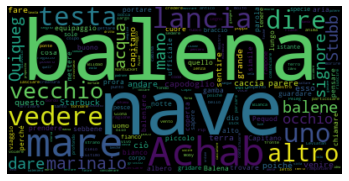

In [168]:
word_cloud = WordCloud().generate_from_frequencies(lemmas_occ)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Parameters of WordCloud function:
* background_color
* max_words
* stopwords
* max_font_size
* random_state
* width
* height

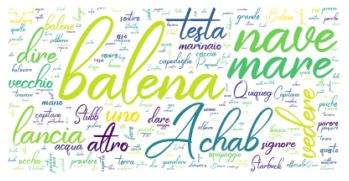

In [182]:
font_path = 'handmade_signature.ttf'
word_cloud = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(lemmas_occ)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [170]:
!python3 -m pip install Pillow

In [171]:
from PIL import Image

In [172]:
import numpy as np

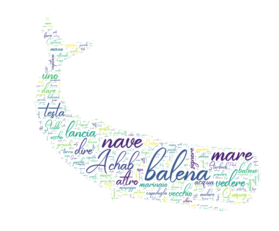

In [230]:
mask = np.array(Image.open('moby_dick_mask.png'))
word_cloud = WordCloud(font_path=font_path, mask=mask, background_color="white", 
                       max_words=2000, max_font_size=256, random_state=42, 
                       width=mask.shape[1], height=mask.shape[0]).generate_from_frequencies(lemmas_occ)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [231]:
from wordcloud import ImageColorGenerator
mask_colors = ImageColorGenerator(mask)

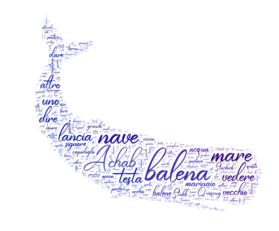

In [232]:
word_cloud = WordCloud(font_path=font_path, mask=mask, background_color="white", 
                       max_words=2000, max_font_size=256, random_state=42, 
                       width=mask.shape[1], height=mask.shape[0],
                       color_func=mask_colors).generate_from_frequencies(lemmas_occ)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('moby_dick_most_common_lemmas.png', dpi=1000)
plt.show()